In [3]:
%matplotlib inline
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
from itertools import product
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import datetime
from proj1_helpers import *
from implementations import *
# Load CSVs
y_train_raw, x_train_raw, ids_train_raw = load_csv_data("data/train.csv", sub_sample=False)
y_test_raw, x_test_raw, ids_test_raw = load_csv_data("data/test.csv", sub_sample=False)

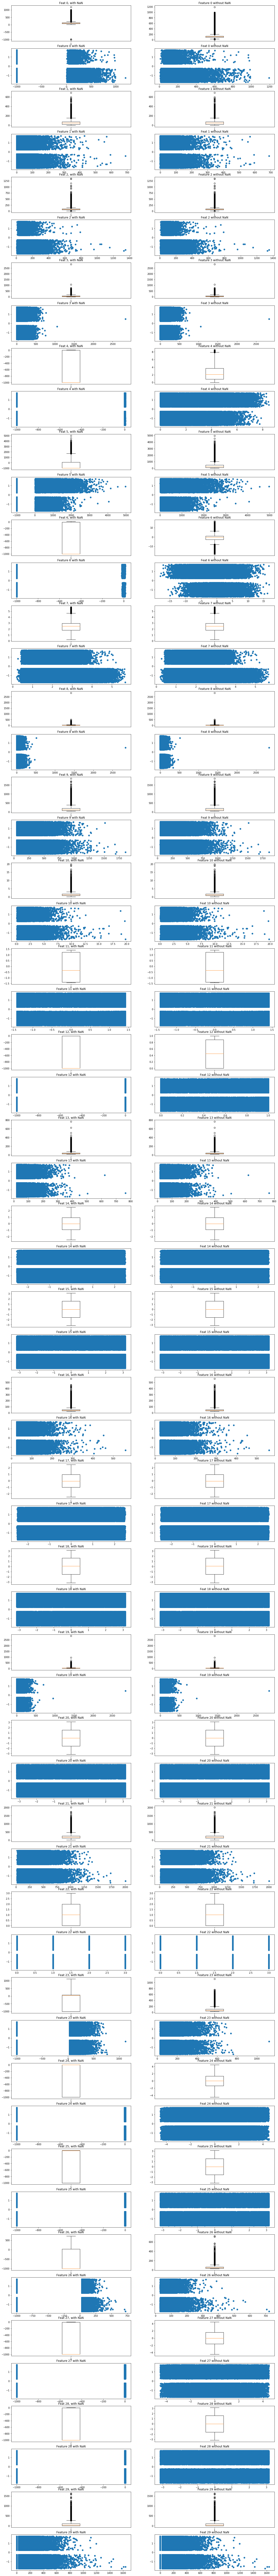

In [6]:
y, x = y_train_raw.copy(), x_train_raw.copy()
x_std = standardize(x)

# adding some noise to y, to better view the values
jitter = np.random.rand(y.shape[0]) * 1.5 - .75
y += jitter 

plt.figure(1, figsize=(20, 200))

figcount = 1
feat_num = 0
for col in x.T:
    plt.subplot(x.shape[1] * 2, 2, figcount)
    plt.boxplot(col)
    plt.title("Feat {}, with NaN".format(feat_num))
    
    plt.subplot(x.shape[1] * 2, 2, figcount + 1)
    plt.boxplot(col[col != -999])
    plt.title("Feature {} without NaN".format(feat_num))
    
    plt.subplot(x.shape[1] * 2, 2, figcount + 2)
    plt.scatter(col, y)
    plt.title("Feature {} with NaN".format(feat_num))
    
    plt.subplot(x.shape[1] * 2, 2, figcount + 3)
    plt.scatter(col[col != -999], y[col != -999])
    plt.title("Feat {} without NaN".format(feat_num))
    figcount += 4
    feat_num += 1
plt.savefig("features_graph.png")
plt.show()